In [40]:
import pandas as pd
import numpy as np

# Fundamental data preprocessing


In [43]:
# CSV of publically traded healthcare companies as classified by GIC subindustry codes
df = pd.read_csv('healthcare_fundamentals_v3.csv') #update w/ latest version

key_table = df[['cik', 'GVKEY']] #keys to join all databases
key_table.head()

,cik,GVKEY
0,319126.0,1021
1,319126.0,1021
2,319126.0,1021
3,319126.0,1021
4,319126.0,1021


In [44]:
#all companies in healthcare industry from 2000 - 2010
print('Total number of unique companies from 2000 - 2010:',df['GVKEY'].nunique())

Total number of unique companies from 2000 - 2010: 1975


In [45]:
#eliminate private companies (ipodate = nan)
mask = df['ipodate'].isna()
print(mask.sum())
print(df.shape)
print(df[-mask].shape)
df = df[-mask]

5251
(14065, 988)
(8814, 988)


In [46]:
#number of public healthcare companies
print('Total number of unique public companies from 2000 - 2010:',df['GVKEY'].nunique())

Total number of unique public companies from 2000 - 2010: 1175


In [47]:
#eliminate rows with no market cap information
mask = df['mkvalt'].isna()
df = df[-mask]
print('Total number of unique private companies with market cap from 2000 - 2010:',df['GVKEY'].nunique())

Total number of unique private companies with market cap from 2000 - 2010: 1055


In [48]:
# df['year'] =  pd.to_datetime(df['datadate']).dt.year
# mask = df['year'] == 2000

# df[mask]['GVKEY'].value_counts()

In [49]:
df['year'] =  pd.to_datetime(df['datadate']).dt.year
df = df.drop_duplicates(['year','GVKEY'])

In [50]:
df.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,year
40,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2000,2000.0,...,6324,287.0,905.0,B+,CT,0.0,www.aetna.com,11/29/2018,09/24/1968,2000
41,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2001,2001.0,...,6324,287.0,905.0,B+,CT,0.0,www.aetna.com,11/29/2018,09/24/1968,2001
43,1177,J,03,NR,NaN,NaN,06/29/2001,01/31/2006,12/31/2002,2002.0,...,6324,287.0,905.0,B+,CT,0.0,www.aetna.com,11/29/2018,09/24/1968,2002
45,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2003,2003.0,...,6324,287.0,905.0,B+,CT,0.0,www.aetna.com,11/29/2018,09/24/1968,2003
47,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2004,2004.0,...,6324,287.0,905.0,B+,CT,0.0,www.aetna.com,11/29/2018,09/24/1968,2004


In [51]:
print('Total number of unique private companies with market cap from 2000 - 2010:',df['GVKEY'].nunique())

Total number of unique private companies with market cap from 2000 - 2010: 1055


# Read in Bankruptcy Data and Merge with Fundamentals

In [55]:
# Bankrupt healthcare companies
df_bankrupt = pd.read_csv('healthcare_bankrupt_audit_analytics_v2.csv')

In [56]:
print('Total of:' ,len(df_bankrupt), "bankruptcy filings")

Total of: 187 bankruptcy filings


In [57]:
#create year column
df_bankrupt['bankrupt_year'] = pd.to_datetime(df_bankrupt['BANK_BEGIN_DATE']).dt.year

#filter for year 2001- 2010
mask = (df_bankrupt['bankrupt_year'] >2000) &  (df_bankrupt['bankrupt_year']  < 2011)
df_bankrupt = df_bankrupt[mask]


In [58]:
print('Total of:' ,len(df_bankrupt), "bankruptcy filings between 2001 and 2010")

Total of: 129 bankruptcy filings between 2001 and 2010


In [59]:
# Get chapter 11 companies only
df_bankrupt= df_bankrupt[df_bankrupt['BANKRUPTCY_TYPE']==11]
print('Total of:' ,len(df_bankrupt), "CH 11 bankruptcy filings between 2001 and 2010")

Total of: 82 CH 11 bankruptcy filings between 2001 and 2010


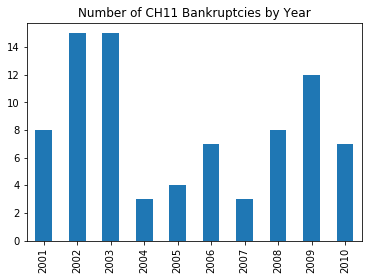

In [60]:
df_bankrupt['bankrupt_year'].value_counts().sort_index().plot(kind = 'bar', title = 'Number of CH11 Bankruptcies by Year')

# Merge Financial Ratios

In [83]:
#create cik - GVKEY table from fundamentals dataset
key_table = key_table.drop_duplicates()
key_table.head()

(1055, 2)

In [72]:
df_fin_ratio = pd.read_csv('fin ratios.csv')
df_fin_ratio['gvkey'].nunique()

1244

In [84]:
bankrupt_key  = pd.merge(df_bankrupt, key_table, left_on = 'COMPANY_FKEY', right_on = 'cik', suffixes = ('_ratio', '_key'), how = 'inner')
# df_table = df_table.drop_duplicates()

In [85]:
bankrupt_key.shape

(53, 467)

In [158]:
#processing for fin ratio to drop duplicates
fin_ratio_bankruptcy['year'] = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year
df_fin_ratio=df_fin_ratio.drop_duplicates(subset=['gvkey','qdate'], keep='last')
df_fin_ratio['qmonth']=pd.to_datetime(df_fin_ratio['qdate']).dt.month
mask= df_fin_ratio['qmonth']==12
df_fin_ratio= df_fin_ratio[mask]

df_fin_ratio.shape

(7526, 76)

In [159]:
fin_ratio_bankruptcy = pd.merge(df_fin_ratio, bankrupt_key, left_on = 'gvkey', right_on = 'GVKEY', suffixes = ('_finratio', '_bankrupt'), how = 'left')

In [160]:
fin_ratio_bankruptcy.shape

(7526, 543)

In [161]:
#create bankruptcy dummy
#adate is year end date
mask = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year + 1 == pd.to_datetime(fin_ratio_bankruptcy['BANK_BEGIN_DATE']).dt.year

fin_ratio_bankruptcy['bankrupted'] = np.where(mask, 1,0)

In [162]:
fin_ratio_bankruptcy['gvkey'].nunique()

1154

In [165]:
fin_ratio_bankruptcy['year'] = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year

In [203]:
fund_ratio_bank  = pd.merge(df, fin_ratio_bankruptcy, left_on = ['GVKEY', 'year'], right_on = ['gvkey', 'year'], suffixes = ('_fund', '_ratio'), how = 'inner')
fund_ratio_bank = fund_ratio_bank.drop(columns = 'GVKEY_ratio')
fund_ratio_bank = fund_ratio_bank.rename(columns = {'GVKEY_fund' : 'GVKEY'})


In [204]:
print('The final dataset includes:',fund_ratio_bank['GVKEY'].nunique(), 'companies, which have fundamental as well as financial ratios values')

The final dataset includes: 817 companies, which have fundamental as well as financial ratios values


In [205]:
fund_ratio_bank.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3,bankrupt_year,cik_ratio,bankrupted
0,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2000,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2001,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1177,J,03,NR,NaN,NaN,06/29/2001,01/31/2006,12/31/2002,2002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2003,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1177,P,01,LC,88845.0,41072.0,12/14/2000,11/30/2018,12/31/2004,2004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [207]:
#filter for market cap size (in MM)
#recommend using this after creating bankruptcy dummy

def market_cap_size(df, lower, upper):
    
    mask = ((df['mkvalt'] >=lower) & (df['mkvalt'] <=upper))
    df =df[mask]
    
    return df


#market cap 500M - 1B
df500 = market_cap_size(fund_ratio_bank, 500,1000)

df500['GVKEY'].nunique()

228

In [101]:
df['GVKEY'].nunique()

1055

In [102]:
fin_ratio_bankruptcy['gvkey'].nunique()

1244

In [77]:
df_bankrupt.shape

(82, 465)

In [78]:
df_bankrupt.drop_duplicates()

,COMPANY_FKEY,BANK_KEY,SUBSID_NAME,BANKRUPTCY_TYPE,LAW_COURT_FKEY,COURT_TYPE_CODE,COURT_NAME,COURT_S_NAME,COURT_LOC_STREET,COURT_LOC_CITY,...,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3,bankrupt_year
1,19411,196,NaN,11,148,1,New York Southern Bankruptcy Court,NY SBC,NaN,NaN,...,2003-12-31,499948000.0,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003
8,353827,534,NaN,11,108,1,Delaware Bankruptcy Court,DE BC,NaN,NaN,...,2005-01-01,0.0,2001-06-30,14600000.0,2001-06-30,NaN,NaN,NaN,NaN,2005
10,356830,1164,NaN,11,133,1,Massachusetts Bankruptcy Court,MA BC,NaN,NaN,...,2007-06-30,16277000.0,2000-08-31,-2816050.0,2000-08-31,NaN,2004-04-08,NaN,NaN,2009
11,357097,1155,NaN,11,108,1,Delaware Bankruptcy Court,DE BC,NaN,NaN,...,2019-06-30,11743000.0,2019-06-30,3595000.0,2000-12-31,0.0,2009-09-14,2001-08-22,NaN,2009
12,704384,1054,NaN,11,110,1,Florida Middle Bankruptcy Court,FL MBC,NaN,NaN,...,2010-09-30,0.0,2010-09-30,-8173000.0,2010-09-30,0.0,2001-05-16,NaN,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1330487,1397,NaN,11,108,1,Delaware Bankruptcy Court,DE BC,NaN,NaN,...,2007-12-28,0.0,2007-12-28,2326382.0,NaN,NaN,2007-11-15,NaN,NaN,2010
171,1340752,1441,NaN,11,133,1,Massachusetts Bankruptcy Court,MA BC,NaN,NaN,...,2005-12-31,0.0,2007-12-31,-59825181.0,2007-12-31,-21654318.0,NaN,NaN,NaN,2010
175,1355804,2285,NaN,11,108,1,Delaware Bankruptcy Court,DE BC,NaN,NaN,...,2008-12-31,0.0,2005-12-31,-10240000.0,2005-12-31,0.0,NaN,NaN,NaN,2010
177,1375098,2297,NaN,11,184,1,Minnesota Bankruptcy Court,MN BC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2006-10-13,NaN,NaN,2004


In [1]:
relevant_columns = df_bankrupt[['COMPANY_FKEY','FILE_DATE']]
#list(df_bankrupt.columns)
df['cik'][:5]

# COMPANY_FKEY is CIK
df_bankrupt['COMPANY_FKEY'][:5]

df_bankrupt['COMPANY_FKEY'].nunique()

#filter for 2000-2010
mask = (pd.to_datetime(df_bankrupt['BANK_BEGIN_DATE']).dt.year >1999) &  (pd.to_datetime(df_bankrupt['BANK_BEGIN_DATE']).dt.year < 2011)

df_bankrupt_2000 = df_bankrupt[mask]

df_bankrupt_2000.head()

In [110]:
df_merge = pd.merge(df, df_bankrupt_2000, left_on = 'cik', right_on = 'COMPANY_FKEY', suffixes = ('_fundam', '_bank'), how = 'left')
df_merge['cik'].nunique()

1788

In [111]:
# df_merge_11 = df_merge[df_merge['BANKRUPTCY_TYPE']==11]
# df_merge_11

In [114]:
df_merge.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,HIWATER_INCMST_REVFY,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3
0,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2000,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2001,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2002,2002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2003,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2004,2004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,287111,C,00X,NR,NaN,NaN,01/01/2010,05/30/2013,12/31/2010,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14071,293754,C,00X,NR,NaN,NaN,01/01/2008,04/07/2011,12/31/2009,2009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14072,293754,C,00X,NR,NaN,NaN,01/01/2008,04/07/2011,12/31/2010,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14073,296885,C,00X,NR,NaN,NaN,01/01/2009,12/26/2012,12/31/2009,2009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df_test = df_merge[df_merge['cik'] ==815508]

In [137]:
df_test.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,HIWATER_INCMST_REVFY,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3
9302,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2000,2000.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9303,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2001,2001.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9304,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2002,2002.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9305,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2003,2003.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9306,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2004,2004.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9307,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2005,2005.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9308,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2006,2006.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9309,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2007,2007.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN
9310,122315,P,01,LC,87057.0,16691.0,07/30/1999,07/21/2009,10/31/2008,2008.0,...,700000.0,2006-10-31,-6281000.0,2009-04-28,-14692330.0,2008-10-28,NaN,NaN,NaN,NaN


In [160]:
mask = pd.to_datetime(df_merge['datadate']).dt.year + 1 == pd.to_datetime(df_merge['BANK_BEGIN_DATE']).dt.year

df_merge['bankrupted'] = np.where(mask, 1,0)

In [163]:
df_merge['bankrupted']

0        0
1        0
2        0
3        0
4        0
        ..
14070    0
14071    0
14072    0
14073    0
14074    0
Name: bankrupted, Length: 14075, dtype: int32

In [158]:
mask = pd.to_datetime(df_merge['datadate']).dt.year + 1 == pd.to_datetime(df_merge['BANK_BEGIN_DATE']).dt.year
df_merge[mask]

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,HIWATER_INCMST_REVFY,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3
373,2903,C,01,LC,22518.0,6193.0,08/04/1993,08/29/2008,03/31/2008,2007.0,...,0.000000e+00,2005-03-31,589000.0,2002-03-31,1157000.0,2002-03-31,NaN,NaN,NaN,NaN
376,2940,C,01,LC,77854.0,25268.0,08/07/1992,10/08/2002,09/30/2002,2002.0,...,1.844645e+09,2003-12-31,499948000.0,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN
445,3171,P,01,LC,24548.0,5308.0,06/30/1982,07/20/2009,12/31/2008,2008.0,...,2.640000e+07,2007-06-30,16277000.0,2000-08-31,-2816050.0,2000-08-31,NaN,2004-04-08,NaN,NaN
596,4228,C,01,LC,84799.0,15464.0,05/09/1997,04/09/2001,12/31/2000,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-14,NaN,NaN
972,7133,C,01,LU,51992.0,6296.0,08/18/1983,05/24/2001,12/31/2000,2000.0,...,NaN,2005-12-31,357000.0,2002-12-31,-1278000.0,2002-12-31,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11733,157758,P,01,LC,90128.0,45084.0,04/16/2004,04/28/2008,12/31/2007,2007.0,...,4.702000e+06,2007-06-30,-1617000.0,2007-06-30,-18960000.0,2007-12-31,-12695000.0,NaN,NaN,NaN
12193,162956,P,01,LC,90945.0,47874.0,10/28/2005,11/03/2008,09/30/2007,2007.0,...,NaN,2004-09-30,0.0,2009-09-30,-8061727.0,2009-09-30,0.0,NaN,NaN,NaN
12580,165857,P,01,LC,91074.0,50193.0,01/26/2006,11/20/2009,12/31/2008,2008.0,...,2.677100e+07,2007-12-31,5466000.0,2007-12-31,-63232000.0,2007-12-31,5466000.0,NaN,NaN,NaN
12608,166200,P,01,LC,91820.0,51809.0,02/02/2007,12/20/2010,12/31/2009,2009.0,...,5.044701e+06,2005-12-31,0.0,2007-12-31,-59825181.0,2007-12-31,-21654318.0,NaN,NaN,NaN


In [159]:
df_merge['cik'].nunique()

1788

In [154]:
pd.to_datetime(df_merge['datadate']).dt.year + 1

0        2001
1        2002
2        2003
3        2004
4        2005
         ... 
14070    2011
14071    2010
14072    2011
14073    2010
14074    2011
Name: datadate, Length: 14075, dtype: int64

In [ ]:
np.where()

In [147]:
pd.to_datetime(df_test['BANK_BEGIN_DATE']).dt.year

9302    2009
9303    2009
9304    2009
9305    2009
9306    2009
9307    2009
9308    2009
9309    2009
9310    2009
Name: BANK_BEGIN_DATE, dtype: int64

In [138]:
df_test['BANK_BEGIN_DATE']

9302    2009-07-16
9303    2009-07-16
9304    2009-07-16
9305    2009-07-16
9306    2009-07-16
9307    2009-07-16
9308    2009-07-16
9309    2009-07-16
9310    2009-07-16
Name: BANK_BEGIN_DATE, dtype: object

In [121]:
df_merge.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,HIWATER_INCMST_REVFY,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3
0,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2000,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2001,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2002,2002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2003,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1021,P,01,NU,NaN,NaN,03/20/1999,E,06/30/2004,2004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,287111,C,00X,NR,NaN,NaN,01/01/2010,05/30/2013,12/31/2010,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14071,293754,C,00X,NR,NaN,NaN,01/01/2008,04/07/2011,12/31/2009,2009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14072,293754,C,00X,NR,NaN,NaN,01/01/2008,04/07/2011,12/31/2010,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14073,296885,C,00X,NR,NaN,NaN,01/01/2009,12/26/2012,12/31/2009,2009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
